# Data Preparation , Handling Data , Filling Missing Values ....

In [25]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from numpy import nan as NA 

### 1. Handling  Missing Data 

*In pandas, we’ve adopted a convention used in the R programming language by refer
ring to missing data as NA, which stands for not available. In statistics applications, 
NA data may either be data that does not exist or that exists but was not (through problems with data collection, for example). When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.*

In [5]:
# In case of Missing Values they are represented as follows : -
print("The data type of NaN value if : ",type(np.nan))  # It represents the Not a Number value with Floating point 
print("The Data Type of None is : ",type(None))

# The Above Mentioned both types can be easily detected 

The data type of NaN value if :  <class 'float'>
The Data Type of None is :  <class 'NoneType'>


In [8]:
sample_data=pd.Series(['Hitler','Mussolini',np.nan,'Stalin','Chin',np.nan])

# Detecting the Null Values using --> obj.isnull() / obj.isna()
sample_data.isna()

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [17]:
# Notice that `None` is also considered as a Null Values 
sample_data
sample_data[6]='None'
print(sample_data)

print("\n",sample_data.isna())

0       Hitler
1    Mussolini
2          NaN
3       Stalin
4         Chin
5          NaN
6         None
dtype: object

 0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool


*Some of the useful methods which can easily and conviniently handle the missing data or fill them are `dropna()` , `fillna()` , `isnull()` , `notnull()`*


![Screenshot 2024-08-27 093136.png](<attachment:Screenshot 2024-08-27 093136.png>)
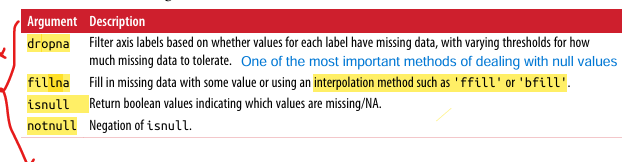

#### Filtering out Missing Data

In [19]:
num_data=pd.Series([1,234,5,4,np.nan,24,np.nan,np.nan])
num_data

0      1.0
1    234.0
2      5.0
3      4.0
4      NaN
5     24.0
6      NaN
7      NaN
dtype: float64

In [24]:
# Drops/Filters out  all the null values if conditions are not defined :-
print(num_data.dropna(),"\n")
# The Same can be filtered out using : -
print(num_data[num_data.notna()])

0      1.0
1    234.0
2      5.0
3      4.0
5     24.0
dtype: float64 

0      1.0
1    234.0
2      5.0
3      4.0
5     24.0
dtype: float64


*It is important to note that when using `dropna()` if inplace is not set to true then it only returns a copy of the data object without making any changes in the original data*

In [27]:
# Creating a Dataframe where selective use of dropna() can be done
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


*Passing `how='all'` will only drop `rows` that are all NA* \
*Passing `how='any'` which is used by default drops all the null values*

In [28]:
# Drop all the rows containing even single null values default(axis=0)
data.dropna(how='any')

,0,1,2
0,1.0,6.5,3.0


In [30]:
# Drop all the rows containing all the null values  default(axis=0)
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


*Note that by default any condition passed through `how` for `dropna` is applicable along `rows` that is the default `axis=0` for all to specifiy operations along columns use `axis=1`  

In [32]:
data[3]=NA
# Adds a null column named '3' to the data frame 

In [33]:
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [36]:
data.dropna(how='all',axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


**Setting a Threshold Values to Filter out the Data** \
*A related way to filter out DataFrame rows tends to concern time series data. Suppose you want to `keep only rows containing a certain number of observations`. You can indicate this with the `thresh=val` argument* 


**The thresh attribute in Pandas' dropna() function specifies the minimum number of non-NaN values required in a row or column to keep it. It does not drop values that are exactly equal to the specified threshold value.** 

Here's a breakdown of how it works:

1. If a row or column has fewer than thresh non-NaN values, it will be dropped.
2. If a row or column has exactly thresh non-NaN values, it will be kept.
3. If a row or column has more than thresh non-NaN values, it will be kept

In [47]:
# Generating Random data set
sdata=pd.DataFrame(np.random.randn(8,6))
sdata

,0,1,2,3,4,5
0,-0.039781,0.469492,1.071603,-0.781141,0.027247,-0.946330
1,-0.583325,0.005800,-1.254468,-0.371273,0.281959,0.204443
2,0.827413,-1.286436,-1.808668,-2.054193,0.060783,0.199345
3,1.372121,-0.321749,-0.552755,-1.133308,-0.048639,-0.898189
4,-0.292882,0.434097,-1.131844,-0.586172,-0.042413,-1.291990
5,1.592873,0.115862,0.598821,1.154843,0.157142,0.824917
6,-0.264504,-0.200512,-0.775568,0.374515,0.334381,-0.225271
7,-0.012690,0.919293,0.616363,0.356251,0.848600,-0.877346


In [54]:
# Assinging random null values to dataset/df
sdata.iloc[2:6,[0,5]]=NA
sdata.iloc[:3,2]=NA
sdata.iloc[[2,5,3],1]=NA
sdata

,0,1,2,3,4,5
0,-0.039781,0.469492,NaN,-0.781141,0.027247,-0.946330
1,-0.583325,0.005800,NaN,-0.371273,0.281959,0.204443
2,NaN,NaN,NaN,-2.054193,0.060783,NaN
3,NaN,NaN,-0.552755,-1.133308,-0.048639,NaN
4,NaN,0.434097,-1.131844,-0.586172,-0.042413,NaN
5,NaN,NaN,0.598821,1.154843,0.157142,NaN
6,-0.264504,-0.200512,-0.775568,0.374515,0.334381,-0.225271
7,-0.012690,0.919293,0.616363,0.356251,0.848600,-0.877346


In [67]:
# default(axis=0)
sdata.dropna(thresh=5)
# There should be minimum of 5 non-NaN Values to keep this row all other rows can be dropped 

,0,1,2,3,4,5
0,-0.039781,0.469492,NaN,-0.781141,0.027247,-0.946330
1,-0.583325,0.005800,NaN,-0.371273,0.281959,0.204443
6,-0.264504,-0.200512,-0.775568,0.374515,0.334381,-0.225271
7,-0.012690,0.919293,0.616363,0.356251,0.848600,-0.877346


 *Concept of `thresh` hold becomes important as it let us spceifies the number min of `non-NaN`/`~Nan` values required to keep the columns/rows as in real life scenarios we can look at data and decide for a row ro column corresponding to an attribute whether if significant amount of NaN are present it can't be dropped as it may lead to loss of other important factors along that row or column* \
**Here we are concerned about the values which are `actual values` / `non-Nan values`**

In [72]:
# The Concept of Threshold can be  down a column too.....
sdata.dropna(thresh=6,axis=1)

,3,4
0,-0.781141,0.027247
1,-0.371273,0.281959
2,-2.054193,0.060783
3,-1.133308,-0.048639
4,-0.586172,-0.042413
5,1.154843,0.157142
6,0.374515,0.334381
7,0.356251,0.848600
